# k近傍法

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 訓練データ生成

In [48]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 1
x1 = np.random.normal(size=50).reshape(-1, 2) + 1

x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


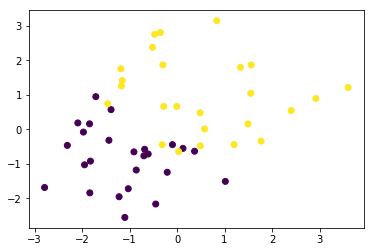

In [49]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

## 学習

陽に訓練ステップはない

## 予測

予測するデータ点との、距離が最も近い$k$個の、訓練データのラベルの最頻値を割り当てる

In [111]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T
print(len(xx[:,0]))

10000


In [102]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

X_train = x_train
X_test = xx
k = 3

# print((X_train))
print(X_test[0])
# print(len(y_train))
# print(distance(X_test[0], X_train))
distance1 = distance(X_test[0], X_train)
indexItem = distance1.argsort()[:k]
mode1, mode2 = stats.mode(y_train[indexItem])
print(distance1)
print(mode1)
print(mode2)
# Yのpredictを詰め込む空の配列を用意長さはX_testと同じ長さdtype→データのタイプでyのトレーニングデータと同じ
y_pred = np.empty(len(X_test), dtype=y_train.dtype)
# iは0からの数値でインクリメントされる（通常使われるiと一緒）
for i, x in enumerate(X_test):
    # X_trainは50個の要素、xは2個の要素
    distances = distance(x, X_train)
    # sortしたインデックスの配列を返す(argsortメソッド)kはk近傍法のkの値を設定
    # 先頭のk個分、値を取得
    nearest_index = distances.argsort()[:k]
    # 近くにあるプロットされている点の0か1の中で一番多く出てくる値を取得
    # _ は返却されてくる個数を表している（今回は未使用）
    mode, _ = stats.mode(y_train[nearest_index])
    # 0か1の値をセット
    y_pred[i] = mode

[-5. -5.]
[ 37.62775519  37.06706997  15.85589943  36.56546387  33.35517743
  36.40150571  25.07231815  35.61349672  34.61091666  38.17917601
  31.72748687  23.55692945  44.77907911  26.5209716   46.02522454
  26.70941292  27.77496899  47.86312249  19.97310674  35.33669945
  48.37182622  44.04037912  21.19207409  46.15659231  28.73471883
  50.56961979  90.14626475  67.50710153  56.22102044  45.43643858
  60.10273446  79.43018251  44.28974593  80.5709974   97.47220659
  55.88230104  53.77451476  56.98087497  69.22885044  74.4892675
  86.28520848  68.77319872  60.1518962  100.38834853 112.55285281
  82.45983143  59.19870565  85.4948029   54.3436149   42.7139092 ]
[0]
[3]


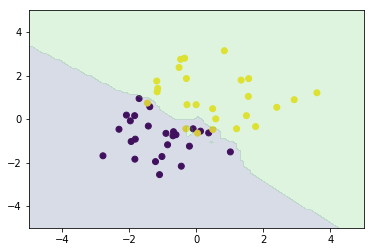

In [100]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))